In [2]:
%reset -f

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


All Variables:
Uncorrelated Variables:
{1: 'accm_1974_2013', 2: 'CCSM4_1974_2013_ero', 3: 'CCSM4_1974_2013_ndays', 4: 'DEM_Elev', 5: 'DEM_Slope', 6: 'POL_bd', 7: 'POL_ksat', 8: 'POL_om', 9: 'POL_ph', 10: 'POL_sand', 11: 'RAP_afgNPP', 12: 'RAP_bgr', 13: 'RAP_ltr', 14: 'RAP_pfgNPP', 15: 'RAP_shrNPP', 16: 'RAP_treNPP', 17: 'tmomn_1974_2013'}
{1: 'accm_1974_2013', 2: 'CCSM4_1974_2013_ero', 3: 'CCSM4_1974_2013_ndays', 4: 'DEM_Elev', 5: 'DEM_Slope', 6: 'POL_bd', 7: 'POL_ksat', 8: 'POL_om', 9: 'POL_ph', 10: 'POL_sand', 11: 'RAP_afgNPP', 12: 'RAP_bgr', 13: 'RAP_ltr', 14: 'RAP_pfgNPP', 15: 'RAP_shrNPP', 16: 'RAP_treNPP', 17: 'tmomn_1974_2013'}


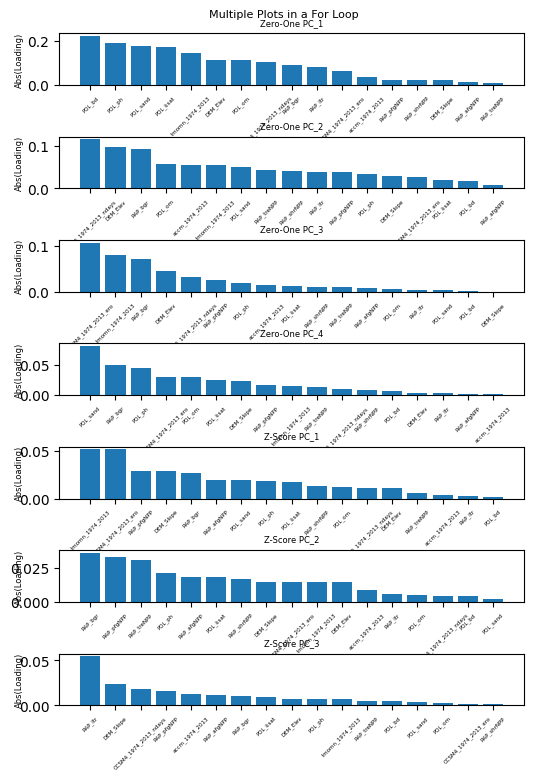

In [32]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

selection = 'ZO' #ZS OR ZO
if selection == 'ZS':
  components = 12
else:
  components = 8

zof = '/content/drive/My Drive/Colab Notebooks/Analogs/MultidimRasterLyr_d_loading_ZO.csv'
zsf = '/content/drive/My Drive/Colab Notebooks/Analogs/MultidimRasterLyr_d_loading_ZS.csv'
datafld = '/content/drive/My Drive/Colab Notebooks/Analogs/Data'

data_files = os.listdir(datafld)

input_string = ';'.join(data_files)
input_list = input_string.split(';')

removal_choices = ['tmomx_1974_2013.tif', 'pmomx_1974_2013.tif', 'pmomn_1974_2013.tif', 'CCSM4_1974_2013_swe.tif', 'CCSM4_1974_2013_consec.tif', 'CCSM4_1974_2013_pet.tif', 'POL_theta_s.tif', 'POL_theta_r.tif', 'POL_clay.tif', 'POL_silt.tif', 'RAP_afg.tif', 'RAP_pfg.tif', 'RAP_tre.tif', 'RAP_shr.tif', 'tmean_1974_2013.tif']

uncorr_input_list = []
for l in input_list:
  if l not in removal_choices:
    uncorr_input_list.append(l)

uncorr_input_string = ';'.join(uncorr_input_list)

var_labels = [s[:-4] for s in input_list]
df = pd.DataFrame(data=var_labels, index=list(range(1, len(var_labels)+1)))
print('All Variables:')
#display(df)

var_labels = [s[:-4] for s in uncorr_input_list]
df = pd.DataFrame(data=var_labels, index=list(range(1, len(var_labels)+1)))
print('Uncorrelated Variables:')
#display(df)

varidx_varlbl_key = df.to_dict()[0]
print(varidx_varlbl_key)

num_comps = 8

print(varidx_varlbl_key)

df = pd.read_csv(zof)

# for i in range(num_comps):
#   col_str = 'PC_{}'.format(i+1)
#   sorted_df = df.sort_values(by=col_str, key=abs, ascending=False)
#   sorted_idx = [x+1 for x in sorted_df.index.to_list()]
#   x_labels = [varidx_varlbl_key[sorted_idx[j]] for j in range(len(sorted_idx))]
#   y = sorted_df[col_str].to_list()
#   y_abs = [abs(n) for n in y]
#   fig, ax = plt.subplots(figsize=(8.5, 3))
#   ax.tick_params(axis='x', labelrotation=45)
#   fig.tight_layout()
#   fig.autofmt_xdate()
#   ax.set_title('PC_{} '.format(i+1) + 'Loadings')
#   ax.bar(x_labels, y_abs)


fig, axes = plt.subplots(nrows=7, ncols=1, figsize=(6, 8))
plt.subplots_adjust(wspace=0.5, hspace=1.0, top=0.95)
fig.suptitle('Multiple Plots in a For Loop', fontsize=8)

#fig.tight_layout()
#fig.autofmt_xdate()

ax_titles = ['Zero-One PC_1', 'Zero-One PC_2', 'Zero-One PC_3', 'Zero-One PC_4', 'Z-Score PC_1', 'Z-Score PC_2', 'Z-Score PC_3']

for i, ax in enumerate(axes.flat):
  col_str = 'PC_{}'.format(i+1)
  sorted_df = df.sort_values(by=col_str, key=abs, ascending=False)
  sorted_idx = [x+1 for x in sorted_df.index.to_list()]
  x_labels = [varidx_varlbl_key[sorted_idx[j]] for j in range(len(sorted_idx))]
  y = sorted_df[col_str].to_list()
  y_abs = [abs(n) for n in y]
  ax.tick_params(axis='x', labelrotation=45, labelsize=4)
  ax.set_title(ax_titles[i], fontsize=6)
  ax.bar(x_labels, y_abs)
  ax.text(-3, 0, 'Abs(Loading)', fontsize=6, rotation=90)


